In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.simplefilter(action='ignore')

Dataset: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/26147

In [3]:
data = pd.read_csv('harvardX.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338223 entries, 0 to 338222
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   course_id          338223 non-null  object 
 1   userid_DI          338223 non-null  object 
 2   registered         338223 non-null  int64  
 3   viewed             338223 non-null  int64  
 4   explored           338223 non-null  int64  
 5   certified          338223 non-null  int64  
 6   final_cc_cname_DI  338223 non-null  object 
 7   LoE_DI             294104 non-null  object 
 8   YoB                299719 non-null  float64
 9   gender             305262 non-null  object 
 10  grade              312333 non-null  object 
 11  start_time_DI      338223 non-null  object 
 12  last_event_DI      185992 non-null  object 
 13  nevents            178945 non-null  float64
 14  ndays_act          195713 non-null  float64
 15  nplay_video        33277 non-null   float64
 16  nc

In [5]:
data.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,12/19/12,11/17/13,NaN,9.0,NaN,NaN,0,NaN,1.0
1,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2/8/13,11/17/13,NaN,16.0,NaN,NaN,0,NaN,1.0
2,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,France,NaN,NaN,NaN,0,1/1/13,5/14/13,42.0,6.0,NaN,3.0,0,NaN,NaN
3,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0,2/18/13,3/17/13,70.0,3.0,NaN,3.0,0,NaN,NaN
4,HarvardX/CB22x/2013_Spring,MHxPC130024894,1,1,0,0,United States,NaN,NaN,NaN,0.07,1/24/13,8/3/13,175.0,9.0,NaN,7.0,0,NaN,NaN


In [6]:
data.isna().sum()

course_id                 0
userid_DI                 0
registered                0
viewed                    0
explored                  0
certified                 0
final_cc_cname_DI         0
LoE_DI                44119
YoB                   38504
gender                32961
grade                 25890
start_time_DI             0
last_event_DI        152231
nevents              159278
ndays_act            142510
nplay_video          304946
nchapters            144465
nforum_posts              0
roles                338223
incomplete_flag      260838
dtype: int64

Because we want to predict grades, we can remove the missing grade entries.

In [7]:
df = data[data['grade'].notna()]

In [8]:
df.isna().sum()

course_id                 0
userid_DI                 0
registered                0
viewed                    0
explored                  0
certified                 0
final_cc_cname_DI         0
LoE_DI                40619
YoB                   35037
gender                29991
grade                     0
start_time_DI             0
last_event_DI        147405
nevents              153305
ndays_act            138691
nplay_video          284580
nchapters            132365
nforum_posts              0
roles                312333
incomplete_flag      237193
dtype: int64

In [9]:
df['course_id'].value_counts()

HarvardX/CS50x/2012            169621
HarvardX/ER22x/2013_Spring      49296
HarvardX/PH207x/2012_Fall       35683
HarvardX/PH278x/2013_Spring     32860
HarvardX/CB22x/2013_Spring      24873
Name: course_id, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312333 entries, 0 to 338220
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   course_id          312333 non-null  object 
 1   userid_DI          312333 non-null  object 
 2   registered         312333 non-null  int64  
 3   viewed             312333 non-null  int64  
 4   explored           312333 non-null  int64  
 5   certified          312333 non-null  int64  
 6   final_cc_cname_DI  312333 non-null  object 
 7   LoE_DI             271714 non-null  object 
 8   YoB                277296 non-null  float64
 9   gender             282342 non-null  object 
 10  grade              312333 non-null  object 
 11  start_time_DI      312333 non-null  object 
 12  last_event_DI      164928 non-null  object 
 13  nevents            159028 non-null  float64
 14  ndays_act          173642 non-null  float64
 15  nplay_video        27753 non-null   float64
 16  nc

In [11]:
df[pd.to_numeric(df.grade, errors='coerce').isnull()]

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
149,HarvardX/CB22x/2013_Spring,MHxPC130558755,1,1,0,0,Other Oceania,NaN,NaN,NaN,,2/14/13,5/26/13,96.0,14.0,NaN,3.0,0,NaN,NaN
163,HarvardX/CB22x/2013_Spring,MHxPC130486263,1,0,0,0,Other Oceania,NaN,NaN,NaN,,1/22/13,11/17/13,NaN,NaN,NaN,NaN,0,NaN,NaN
898,HarvardX/CB22x/2013_Spring,MHxPC130134402,1,0,0,0,Other Oceania,NaN,NaN,NaN,,12/20/12,11/17/13,NaN,NaN,NaN,NaN,0,NaN,NaN
955,HarvardX/CB22x/2013_Spring,MHxPC130210205,1,1,0,0,Other Oceania,NaN,NaN,NaN,,12/25/12,3/22/13,31.0,4.0,NaN,1.0,0,NaN,NaN
1476,HarvardX/CB22x/2013_Spring,MHxPC130244406,1,1,0,0,Other Oceania,NaN,NaN,NaN,,7/5/13,7/5/13,10.0,1.0,NaN,2.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337779,HarvardX/PH278x/2013_Spring,MHxPC130239601,1,0,0,0,China,Master's,1981.0,f,,7/30/13,7/30/13,3.0,1.0,NaN,NaN,0,NaN,NaN
337933,HarvardX/PH278x/2013_Spring,MHxPC130318488,1,1,0,0,China,Master's,1986.0,m,,8/3/13,8/3/13,3.0,1.0,NaN,1.0,0,NaN,NaN
337939,HarvardX/PH278x/2013_Spring,MHxPC130447191,1,0,0,0,Nigeria,Bachelor's,1970.0,m,,8/3/13,8/3/13,1.0,1.0,NaN,NaN,0,NaN,NaN
338069,HarvardX/PH278x/2013_Spring,MHxPC130156550,1,1,0,0,Other East Asia,Bachelor's,1983.0,m,,8/8/13,8/8/13,84.0,1.0,13.0,3.0,0,NaN,NaN


In [12]:
df.loc[:,('grade')]=pd.to_numeric(df.grade, errors='coerce')

In [13]:
df['grade'].isna().sum()

2695

In [14]:
df = df[df['grade'].notna()]

In [15]:
df['grade'].isna().sum()

0

In [16]:
df.groupby(['course_id'])['grade'].mean()

course_id
HarvardX/CB22x/2013_Spring     0.016528
HarvardX/CS50x/2012            0.007646
HarvardX/ER22x/2013_Spring     0.047294
HarvardX/PH207x/2012_Fall      0.073122
HarvardX/PH278x/2013_Spring    0.026606
Name: grade, dtype: float64

In [17]:
mis_val = [var for var in df.columns if df[var].isnull().sum()>0]
df[mis_val].isnull().sum()

LoE_DI              40508
YoB                 34941
gender              29923
last_event_DI      146055
nevents            151798
ndays_act          137323
nplay_video        282008
nchapters          131085
roles              309638
incomplete_flag    235180
dtype: int64

In [18]:
def drop_columns_with_max_missing_values(df):
    mis_var = [var for var in df.columns if df[var].isnull().sum() > 0]
    df[mis_var].isnull().sum()

    limit = np.abs((df.shape[0] * 0.6))
    var_to_be_dropped = [var for var in mis_var if df[var].isnull().sum() > limit]
    print('Columns with more than 60% missing values: \n\n', var_to_be_dropped)
    print('\n##### Dropping columns with more than 60% missing values #####\n')

    df.drop(columns=var_to_be_dropped, axis=1, inplace=True)
    print('Remaining columns: \n', df.columns)
    return df

df = drop_columns_with_max_missing_values(df)

Columns with more than 60% missing values: 

 ['nplay_video', 'roles', 'incomplete_flag']

##### Dropping columns with more than 60% missing values #####

Remaining columns: 
 Index(['course_id', 'userid_DI', 'registered', 'viewed', 'explored',
       'certified', 'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender', 'grade',
       'start_time_DI', 'last_event_DI', 'nevents', 'ndays_act', 'nchapters',
       'nforum_posts'],
      dtype='object')


In [19]:
df.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nchapters,nforum_posts
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0.00,12/19/12,11/17/13,NaN,9.0,NaN,0
1,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0.00,2/8/13,11/17/13,NaN,16.0,NaN,0
2,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,France,NaN,NaN,NaN,0.00,1/1/13,5/14/13,42.0,6.0,3.0,0
3,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0.00,2/18/13,3/17/13,70.0,3.0,3.0,0
4,HarvardX/CB22x/2013_Spring,MHxPC130024894,1,1,0,0,United States,NaN,NaN,NaN,0.07,1/24/13,8/3/13,175.0,9.0,7.0,0


In [20]:
def replace_missing_data(df, mis_vars):
    print('##### Replacing missing values with mode of features #####')
    for var in mis_vars:
        df[var] = df[var].fillna(df[var].mode()[0])
    return df

mis_var = [var for var in df.columns if df[var].isnull().sum() > 0]
df = replace_missing_data(df, mis_var)


##### Replacing missing values with mode of features #####


In [21]:
df.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nchapters,nforum_posts
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,Bachelor's,1990.0,m,0.00,12/19/12,11/17/13,1.0,9.0,1.0,0
1,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,1990.0,m,0.00,2/8/13,11/17/13,1.0,16.0,1.0,0
2,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,France,Bachelor's,1990.0,m,0.00,1/1/13,5/14/13,42.0,6.0,3.0,0
3,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,Bachelor's,1990.0,m,0.00,2/18/13,3/17/13,70.0,3.0,3.0,0
4,HarvardX/CB22x/2013_Spring,MHxPC130024894,1,1,0,0,United States,Bachelor's,1990.0,m,0.07,1/24/13,8/3/13,175.0,9.0,7.0,0


In [22]:
df['start_time_DI'] = pd.to_datetime(df['start_time_DI'])

In [23]:
df['last_event_DI'] = pd.to_datetime(df['last_event_DI'])

In [24]:
df['Start_year'] = df['start_time_DI'].dt.year

In [25]:
df['Age'] = df['Start_year'] - df['YoB']

In [26]:
df['Duration'] = df['last_event_DI'] - df['start_time_DI']

In [27]:
df['Duration'] = df['Duration'].dt.days

In [28]:
new_df = df.drop(['start_time_DI','last_event_DI','YoB','Start_year'], axis = 1)

In [29]:
cat_vars = [var for var in new_df.columns if df[var].dtypes=='O']
cat_vars = cat_vars[2:]

In [30]:
cat_vars

['final_cc_cname_DI', 'LoE_DI', 'gender']

In [31]:
num_vars = [key for key in dict(new_df.dtypes) if dict(new_df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
num_vars

['registered',
 'viewed',
 'explored',
 'certified',
 'grade',
 'nevents',
 'ndays_act',
 'nchapters',
 'nforum_posts',
 'Age',
 'Duration']

In [32]:
def encode_categorical_variables(d, cat_vars):
    print('##### Performing Label Encoding on Categorical Variables #####')
    print('Categorical variables: ', cat_vars)
    for i in range(len(cat_vars)):
        var = cat_vars[i]
        var_le = LabelEncoder()
        var_labels = var_le.fit_transform(d[var])
        var_mappings = {index: label for index, label in enumerate(var_le.classes_)}
        d[(var + '_labels')] = var_labels
        d.drop(columns=var, axis=1, inplace=True)
    return d

new_df = encode_categorical_variables(new_df, cat_vars)

##### Performing Label Encoding on Categorical Variables #####
Categorical variables:  ['final_cc_cname_DI', 'LoE_DI', 'gender']


In [33]:
temp_df = df.drop(['start_time_DI','last_event_DI','YoB','Start_year'], axis = 1)

In [92]:
#temp_df['final_cc_cname_DI'].value_counts()

In [34]:
new_df.head()

,course_id,userid_DI,registered,viewed,explored,certified,grade,nevents,ndays_act,nchapters,nforum_posts,Age,Duration,final_cc_cname_DI_labels,LoE_DI_labels,gender_labels
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,0.00,1.0,9.0,1.0,0,22.0,333,32,0,1
1,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,0.00,1.0,16.0,1.0,0,23.0,282,32,0,1
2,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,0.00,42.0,6.0,3.0,0,23.0,133,7,0,1
3,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,0.00,70.0,3.0,3.0,0,23.0,27,32,0,1
4,HarvardX/CB22x/2013_Spring,MHxPC130024894,1,1,0,0,0.07,175.0,9.0,7.0,0,23.0,191,32,0,1


In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309638 entries, 0 to 338220
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   course_id                 309638 non-null  object 
 1   userid_DI                 309638 non-null  object 
 2   registered                309638 non-null  int64  
 3   viewed                    309638 non-null  int64  
 4   explored                  309638 non-null  int64  
 5   certified                 309638 non-null  int64  
 6   grade                     309638 non-null  float64
 7   nevents                   309638 non-null  float64
 8   ndays_act                 309638 non-null  float64
 9   nchapters                 309638 non-null  float64
 10  nforum_posts              309638 non-null  int64  
 11  Age                       309638 non-null  float64
 12  Duration                  309638 non-null  int64  
 13  final_cc_cname_DI_labels  309638 non-null  i

In [36]:
new_df.corr()

,registered,viewed,explored,certified,grade,nevents,ndays_act,nchapters,nforum_posts,Age,Duration,final_cc_cname_DI_labels,LoE_DI_labels,gender_labels
registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
viewed,NaN,1.000000,0.225652,0.126118,0.154984,0.149591,0.208468,0.322041,0.062946,0.000137,-0.174364,-0.090175,0.018985,0.056013
explored,NaN,0.225652,1.000000,0.510324,0.564263,0.445215,0.553081,0.775779,0.068588,-0.002944,-0.055999,-0.088624,0.003314,0.034064
certified,NaN,0.126118,0.510324,1.000000,0.938368,0.513588,0.579039,0.597359,0.082766,0.001914,-0.045581,-0.061956,0.006413,-0.015631
grade,NaN,0.154984,0.564263,0.938368,1.000000,0.604164,0.642612,0.639122,0.092505,0.004948,-0.067463,-0.076821,0.003764,-0.025909
nevents,NaN,0.149591,0.445215,0.513588,0.604164,1.000000,0.672879,0.477741,0.100742,0.035370,-0.083516,-0.065367,-0.002121,-0.051290
ndays_act,NaN,0.208468,0.553081,0.579039,0.642612,0.672879,1.000000,0.618823,0.119447,0.046158,-0.096619,-0.092424,-0.005685,-0.024647
nchapters,NaN,0.322041,0.775779,0.597359,0.639122,0.477741,0.618823,1.000000,0.148791,0.023132,-0.135067,-0.103376,0.003709,0.011712
nforum_posts,NaN,0.062946,0.068588,0.082766,0.092505,0.100742,0.119447,0.148791,1.000000,-0.020451,-0.052450,0.000942,-0.003327,0.004625
Age,NaN,0.000137,-0.002944,0.001914,0.004948,0.035370,0.046158,0.023132,-0.020451,1.000000,-0.059099,0.154913,-0.021411,-0.077106


<Axes: >

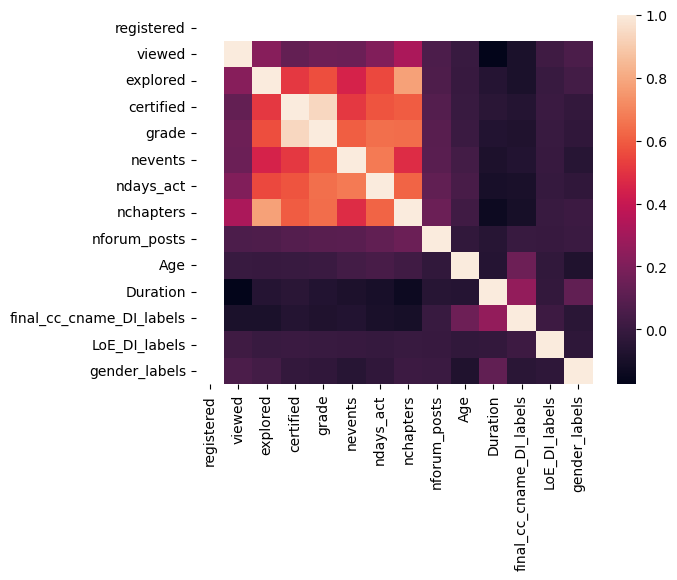

In [37]:
sns.heatmap(new_df.corr())

Grade is the dependent variable. In the correlation map above there are many features that are not correlated with the grade variable. Duration and country are the ones that have zero correlation with final grade, therefore we can drop those 2. In general, demographics seems to have little or no impact on grades. Interaction related variables have a higher impact on the final grade.

In [38]:
new_df = new_df.drop(['Duration','final_cc_cname_DI_labels'],axis = 1)
new_df.head()

,course_id,userid_DI,registered,viewed,explored,certified,grade,nevents,ndays_act,nchapters,nforum_posts,Age,LoE_DI_labels,gender_labels
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,0.00,1.0,9.0,1.0,0,22.0,0,1
1,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,0.00,1.0,16.0,1.0,0,23.0,0,1
2,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,0.00,42.0,6.0,3.0,0,23.0,0,1
3,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,0.00,70.0,3.0,3.0,0,23.0,0,1
4,HarvardX/CB22x/2013_Spring,MHxPC130024894,1,1,0,0,0.07,175.0,9.0,7.0,0,23.0,0,1


This concludes our data cleaning and feature engineering step. We dropped the features with more than 60% missing values because these do not carry much information. For the remaining features missing values were populated with the mode (most frequent value). Next, date related features were used to construct new features. For example using start date and year of birth, we could determine the age of the student when starting a particular course. Similarly, using start and end dates we calculated the duration (in days) that a particular student took the course. Finally, all categorical features were converted to numeric values using Label encoder.

In [39]:
new_df.to_csv('Harvard_preprocessed.csv')